In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Needed to pull from site. SPECIFICALLY the stats that I had chosen
headers = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.84 Safari/537.36'),  # noqa: E501
    'Dnt': ('1'),
    'Accept-Encoding': ('gzip, deflate, sdch'),
    'Accept-Language': ('en'),
    'origin': ('http://stats.nba.com')
    }

In [3]:
#Format Data into a DataFrame
def format_nba_dataset(json_data):
    results = json_data['results']
    headers = list(results[1].keys())
    data_frame = pd.DataFrame(data=results, columns=headers)
    return data_frame

In [5]:
# Grab Data From Website
import requests
isolation = "https://stats-prod.nba.com/wp-json/statscms/v1/synergy/player/?category=Isolation&limit=500&names=offensive&q=2523159&season=2017&seasonType=Reg"
answer = requests.get(isolation, headers=headers).json()
cleaning = answer['results'][1].keys()
heading = list(cleaning)
length = len(answer['results'])
jharden = {}

#Find Given Player Name. I use this to find their unique ID to .loc out of my DataFrame
for i in range(length):
    glock = answer['results'][i]
    if glock['PlayerFirstName'] == 'James':
        if glock['PlayerLastName'] == 'Harden':
            jharden = glock
# jhardens PlayerIDSID = 201935
# You can run "jharden" to see all his stats. This is how I got his unique ID

In [6]:
# Transform data into a DataFrame
play_time = format_nba_dataset(answer)

# Below is quick way to set an index
# play_time.set_index("PlayerFirstName", inplace=True)
# play_time.head()

# Filtering out players who take less that 1 Isolated shot per game. Data is already pre-filtered for
# playing a minimum of 10min/game and 10 possessions per play type
play_time = play_time.loc[(play_time.FGAG > 1)]
#jharden_series = play_time.loc[play_time.PlayerIDSID == 201935]

In [7]:
# Selecting Style
# I used https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')

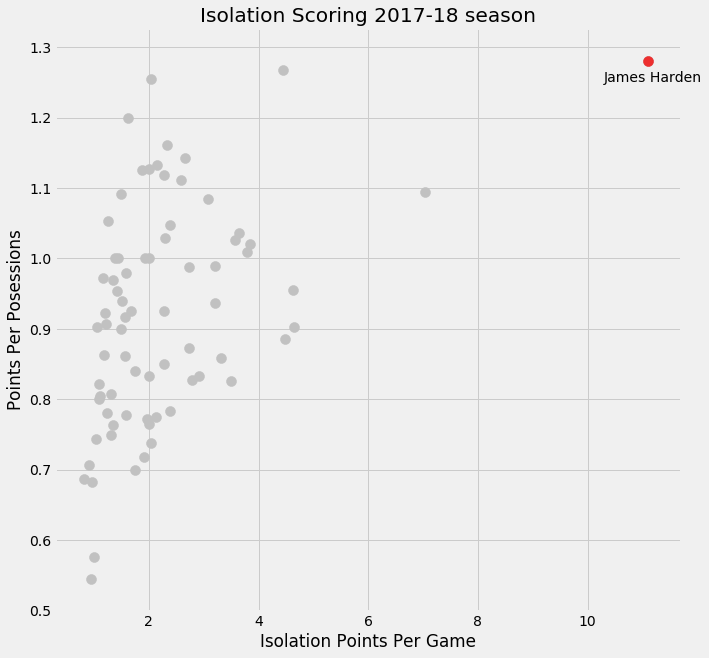

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(play_time.PPG, play_time.PPP,s=100, c='#C1C1C1') # Just use Google's Hex color wheel to pick colors
jharden_series = play_time.loc[play_time.PlayerIDSID == 201935]
plt.scatter(jharden_series.PPG, jharden_series.PPP,s=100, c='#ED2F2F')
plt.text(jharden_series.PPG-0.8, jharden_series.PPP-0.03, s='James Harden')

plt.title("Isolation Scoring 2017-18 season")
plt.ylabel("Points Per Posessions")
plt.xlabel("Isolation Points Per Game")

plt.show()